In [207]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf


In [208]:
df = pd.read_csv('./preprocess_spy_wsj.csv', header=0, index_col=0)
df.head()

date  dividends   week_day  month  day  quarter  diff_close_close  \
0  2020-01-02        0.0   Thursday      1    2        1          2.790588   
1  2020-01-03        0.0     Friday      1    3        1         -2.280670   
2  2020-01-06        0.0     Monday      1    6        1          1.140320   
3  2020-01-07        0.0    Tuesday      1    7        1         -0.843658   
4  2020-01-08        0.0  Wednesday      1    8        1          1.594666   

   pct_change  pct_open_close  pct_close_open  seasonal_diff  \
0    0.009352        0.005220        0.004111      49.333069   
1   -0.007572       -0.011420        0.003892      46.584091   
2    0.003815       -0.005955        0.009829      46.454636   
3   -0.002812       -0.001916       -0.000898      43.449783   
4    0.005330        0.000651        0.004676      45.647797   

   second_diff_seasonal  trend  continuous_increased  continuous_decreased  \
0              3.078751      1                     2                     0   
1             -2.748978     -1                     0                     1   
2             -0.129456      1                     1                     0   
3             -3.004852     -1                     0                     1   
4              2.198013      1                     1                     0   

   high_open_ratio  high_close_ratio  low_open_ratio  low_close_ratio  \
0         0.004173          0.000062       -0.003122        -0.007203   
1         0.007722          0.003815       -0.000187        -0.004063   
2         0.010110          0.000278       -0.000406        -0.010135   
3         0.001610          0.002510       -0.002415        -0.001518   
4         0.008794          0.004099       -0.000836        -0.005486   

   sentiment_score  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN

In [209]:
df.dropna(inplace=True)

In [210]:
df['dividends'] = df['dividends'].apply(lambda x: True if x > 0 else False).astype(int)
df.drop(columns=['day', 'quarter', 'seasonal_diff','diff_close_close'], inplace=True) 
df.drop(columns=[ 'high_open_ratio', 'high_close_ratio', 'low_open_ratio',
       'low_close_ratio'], inplace=True)


In [211]:
# from 2020 to 2025
spy = yf.Ticker("SPY")
hist = spy.history(start="2021-01-01", end="2025-01-31")
hist.head()



Open        High         Low       Close  \
Date                                                                        
2021-01-04 00:00:00-05:00  354.457166  354.589402  344.550017  348.299438   
2021-01-05 00:00:00-05:00  347.647695  351.803217  347.600456  350.698212   
2021-01-06 00:00:00-05:00  349.168222  356.034306  348.611007  352.794861   
2021-01-07 00:00:00-05:00  355.203275  358.792130  355.023830  358.036591   
2021-01-08 00:00:00-05:00  359.443813  360.293802  356.147732  360.076599   

                              Volume  Dividends  Stock Splits  Capital Gains  
Date                                                                          
2021-01-04 00:00:00-05:00  110210800        0.0           0.0            0.0  
2021-01-05 00:00:00-05:00   66426200        0.0           0.0            0.0  
2021-01-06 00:00:00-05:00  107997700        0.0           0.0            0.0  
2021-01-07 00:00:00-05:00   68766800        0.0           0.0            0.0  
2021-01-08 00:00:00-05:00   71677200        0.0           0.0            0.0

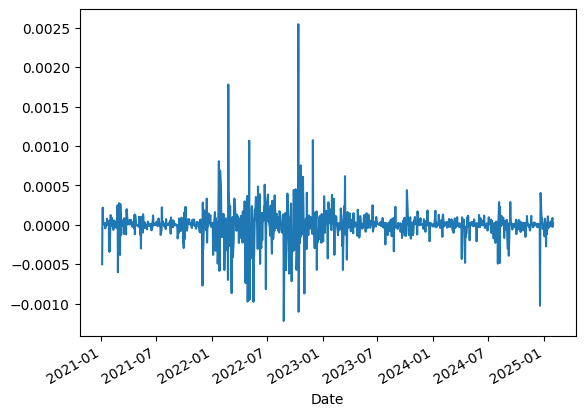

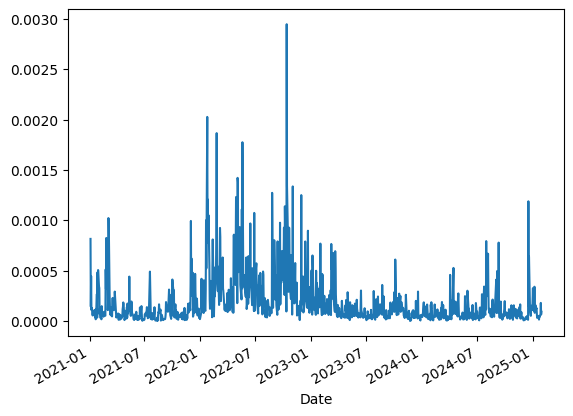

In [212]:




hist['product_open'] = (hist['High'] - hist['Low']) / (hist['Open'])
hist['product_close'] = (hist['High'] - hist['Low']) / (hist['Close'])

hist['product_diff'] = hist['product_open'] - hist['product_close']
hist['product'] = hist['product_open'] * hist['product_close']

hist['product_diff'].plot()
plt.show();

hist['product'].plot()
plt.show();




In [213]:
hist.head()

Open        High         Low       Close  \
Date                                                                        
2021-01-04 00:00:00-05:00  354.457166  354.589402  344.550017  348.299438   
2021-01-05 00:00:00-05:00  347.647695  351.803217  347.600456  350.698212   
2021-01-06 00:00:00-05:00  349.168222  356.034306  348.611007  352.794861   
2021-01-07 00:00:00-05:00  355.203275  358.792130  355.023830  358.036591   
2021-01-08 00:00:00-05:00  359.443813  360.293802  356.147732  360.076599   

                              Volume  Dividends  Stock Splits  Capital Gains  \
Date                                                                           
2021-01-04 00:00:00-05:00  110210800        0.0           0.0            0.0   
2021-01-05 00:00:00-05:00   66426200        0.0           0.0            0.0   
2021-01-06 00:00:00-05:00  107997700        0.0           0.0            0.0   
2021-01-07 00:00:00-05:00   68766800        0.0           0.0            0.0   
2021-01-08 00:00:00-05:00   71677200        0.0           0.0            0.0   

                           product_open  product_close  product_diff   product  
Date                                                                            
2021-01-04 00:00:00-05:00      0.028323       0.028824     -0.000501  0.000816  
2021-01-05 00:00:00-05:00      0.012089       0.011984      0.000105  0.000145  
2021-01-06 00:00:00-05:00      0.021260       0.021041      0.000219  0.000447  
2021-01-07 00:00:00-05:00      0.010609       0.010525      0.000084  0.000112  
2021-01-08 00:00:00-05:00      0.011535       0.011514      0.000020  0.000133

In [214]:
hist['trend'] = hist.apply(lambda row: 1 if row['Close'] >= row['Open'] else 0, axis=1)


In [215]:
# to datetime
hist['date'] = pd.to_datetime(hist.index)
hist.reset_index(inplace=True, drop=True)

hist['date'] = hist['date'].dt.date 
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.date


hist = hist[['date', 'product', 'product_diff',  'trend']]
df.drop(columns=['trend'], inplace=True)
# merge the two dataframes on the date
df = pd.merge(df, hist, on='date', how='left')

df.head(1)

date  dividends week_day  month  pct_change  pct_open_close  \
0  2021-02-01          0   Monday      2    0.016645        0.009863   

   pct_close_open  second_diff_seasonal  continuous_increased  \
0        0.006716              7.874756                     1   

   continuous_decreased  sentiment_score   product  product_diff  trend  
0                     0         0.097755  0.000345      0.000124    1.0

In [216]:
# one hot encoding for weekdays

df = pd.get_dummies(df, columns=['week_day'], dtype=int)

In [217]:
df.columns

Index(['date', 'dividends', 'month', 'pct_change', 'pct_open_close',
       'pct_close_open', 'second_diff_seasonal', 'continuous_increased',
       'continuous_decreased', 'sentiment_score', 'product', 'product_diff',
       'trend', 'week_day_Friday', 'week_day_Monday', 'week_day_Thursday',
       'week_day_Tuesday', 'week_day_Wednesday'],
      dtype='object')

In [218]:

# convert the month integer to datetime and then to string (ex. Jan) and one hot encode it
df['month'] = df['month'].apply(lambda x: pd.to_datetime(f'2020-{x}-01').strftime('%b'))

df = pd.get_dummies(df, columns=['month'], dtype=int)

df.columns



Index(['date', 'dividends', 'pct_change', 'pct_open_close', 'pct_close_open',
       'second_diff_seasonal', 'continuous_increased', 'continuous_decreased',
       'sentiment_score', 'product', 'product_diff', 'trend',
       'week_day_Friday', 'week_day_Monday', 'week_day_Thursday',
       'week_day_Tuesday', 'week_day_Wednesday', 'month_Apr', 'month_Aug',
       'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun',
       'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep'],
      dtype='object')

In [219]:
df.columns

Index(['date', 'dividends', 'pct_change', 'pct_open_close', 'pct_close_open',
       'second_diff_seasonal', 'continuous_increased', 'continuous_decreased',
       'sentiment_score', 'product', 'product_diff', 'trend',
       'week_day_Friday', 'week_day_Monday', 'week_day_Thursday',
       'week_day_Tuesday', 'week_day_Wednesday', 'month_Apr', 'month_Aug',
       'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun',
       'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep'],
      dtype='object')

In [220]:
# move trend to the end

df[['pct_change', 'pct_close_open','second_diff_seasonal','continuous_increased','continuous_decreased', 'product', 'product_diff', 
    'sentiment_score']] = df[['pct_change', 'pct_close_open','second_diff_seasonal','continuous_increased',
                              'continuous_decreased', 'product', 'product_diff', 'sentiment_score']].shift(1)






In [221]:
df.isna().sum()

date                    0
dividends               0
pct_change              1
pct_open_close          0
pct_close_open          1
second_diff_seasonal    1
continuous_increased    1
continuous_decreased    1
sentiment_score         1
product                 2
product_diff            2
trend                   2
week_day_Friday         0
week_day_Monday         0
week_day_Thursday       0
week_day_Tuesday        0
week_day_Wednesday      0
month_Apr               0
month_Aug               0
month_Dec               0
month_Feb               0
month_Jan               0
month_Jul               0
month_Jun               0
month_Mar               0
month_May               0
month_Nov               0
month_Oct               0
month_Sep               0
dtype: int64

In [222]:
comp_dict = {}
for i, comp in enumerate(df.columns.tolist()):
    comp_dict[comp] = i

In [223]:

df['sentiment_score'] = (df['sentiment_score'].shift(-1, fill_value=0) + df["sentiment_score"])/2


In [224]:
# move trend to last column

trend = df.pop('trend')
df['trend'] = trend

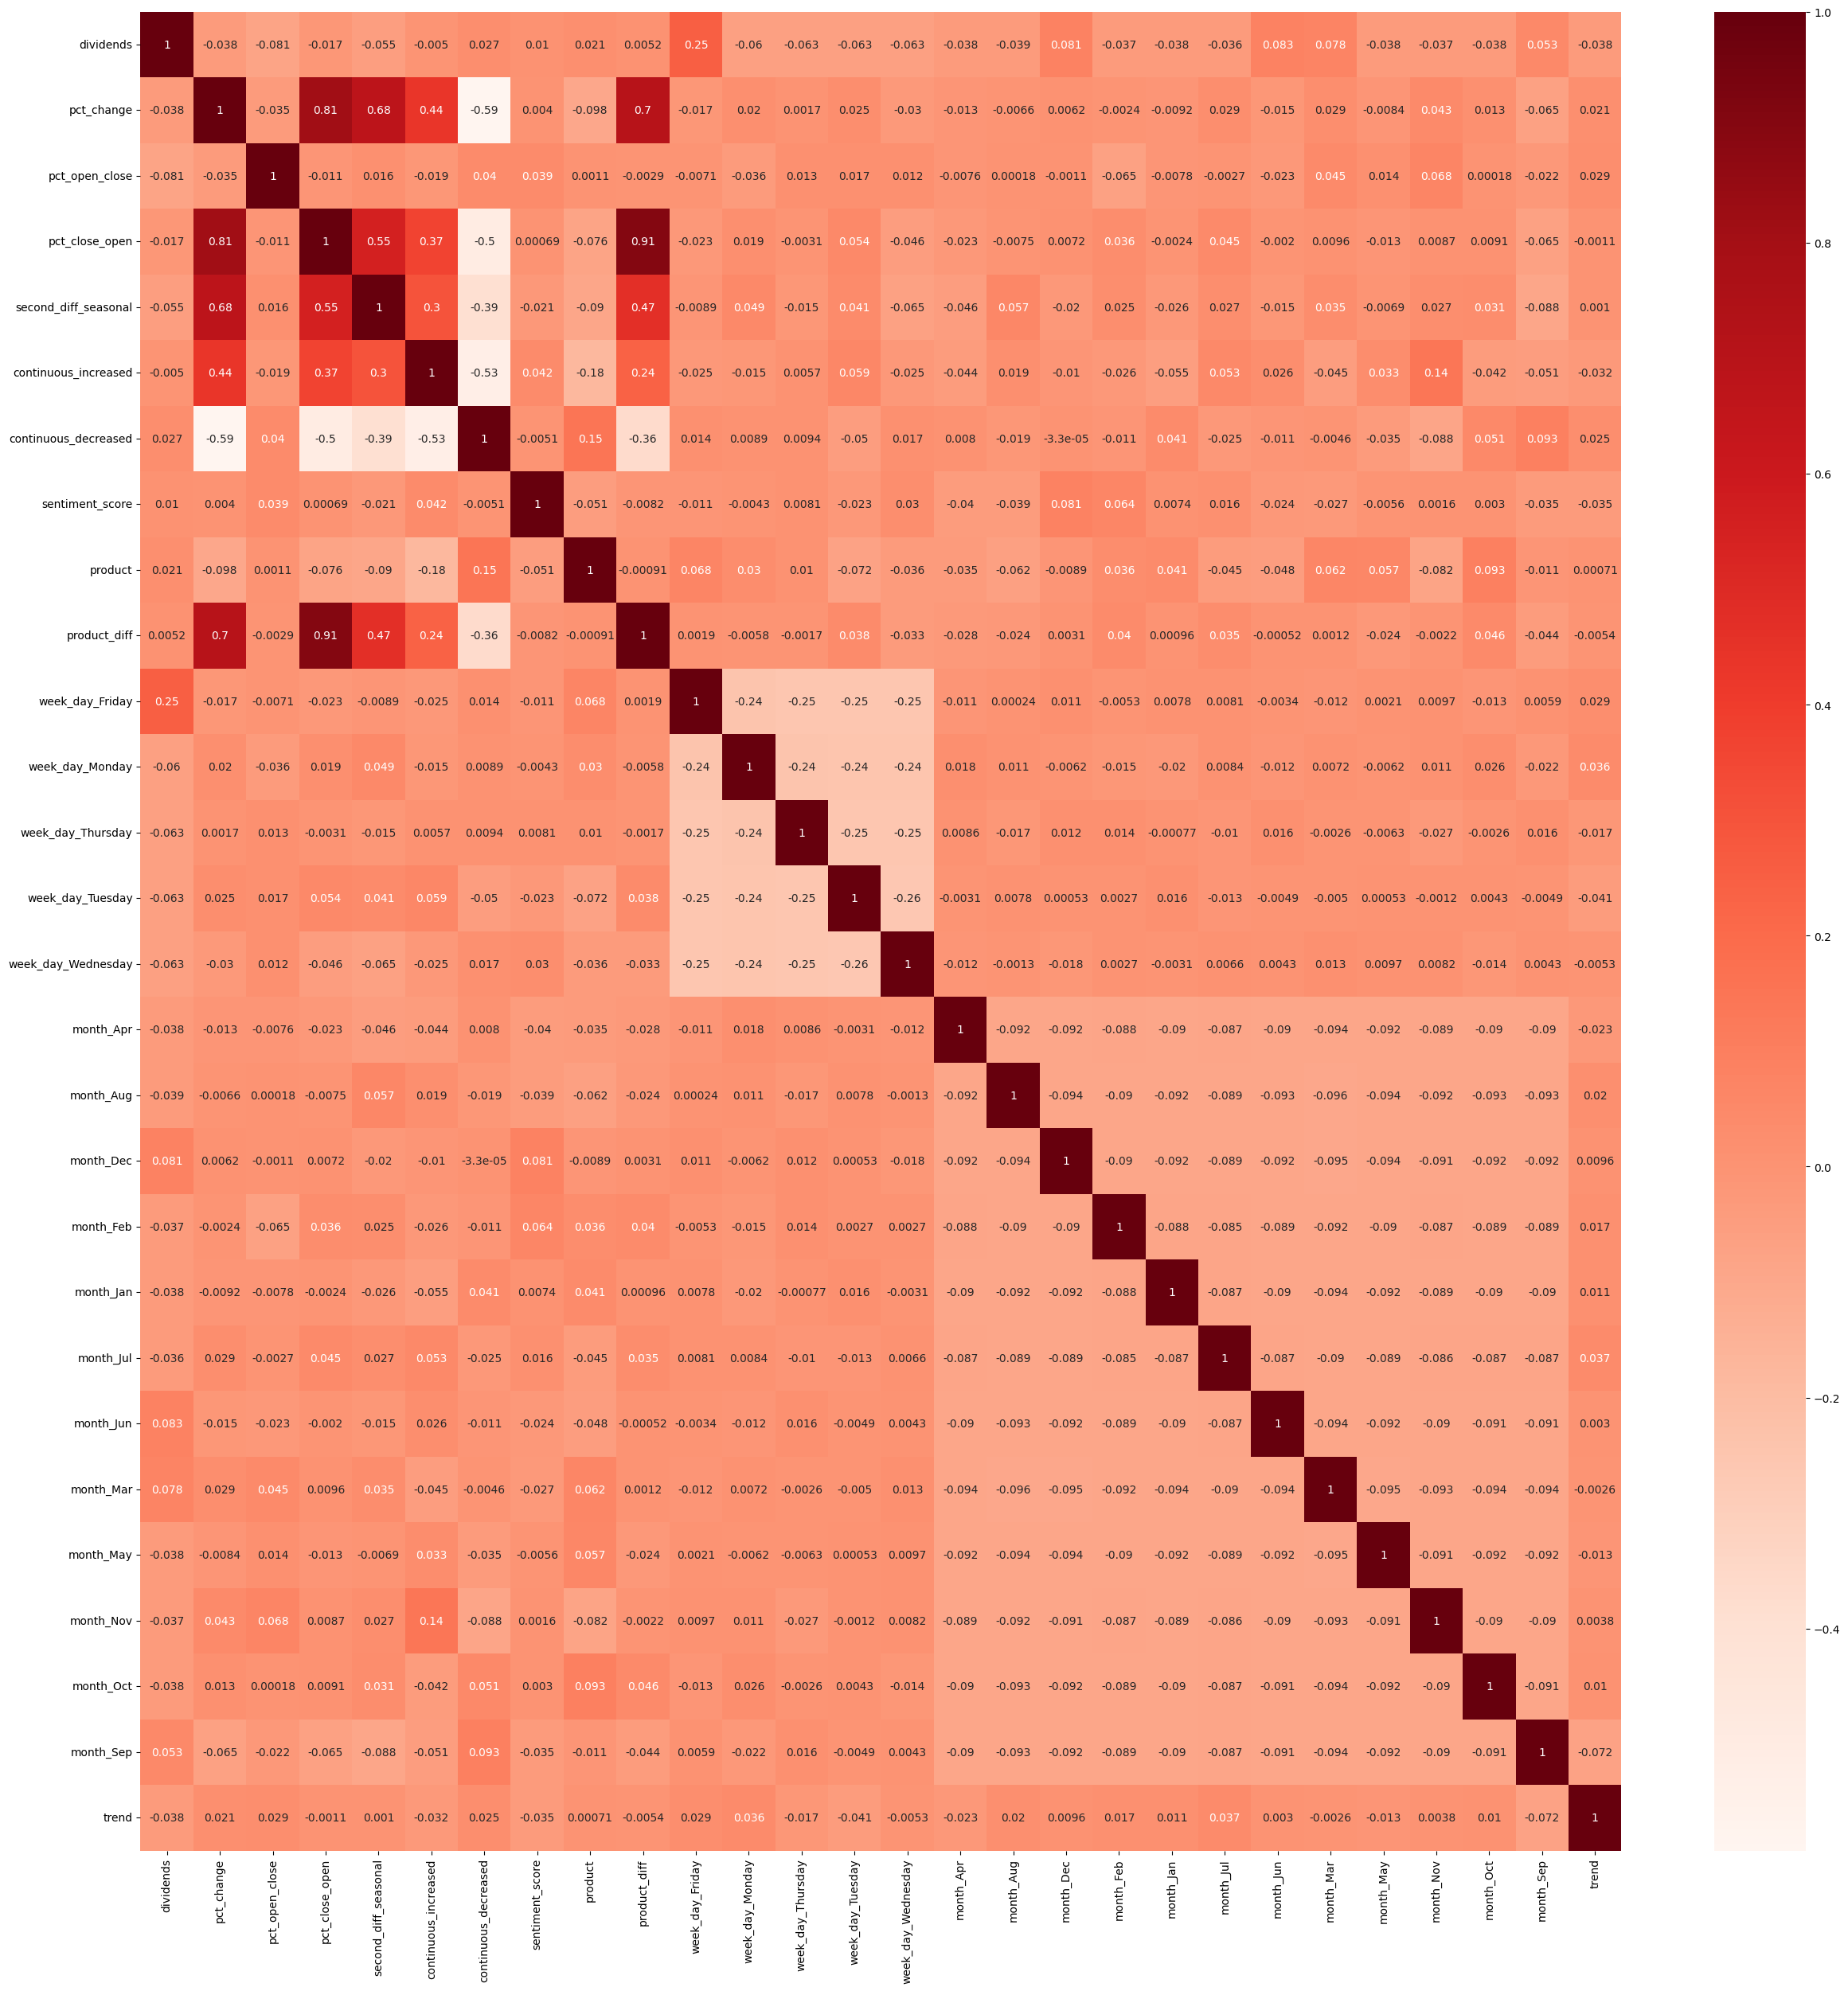

In [225]:
cor = df.loc[:, 'dividends':].corr()

# create a heat map

plt.figure(figsize=(30, 30))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [226]:
df.drop(columns='date').corr()['trend'].sort_values(ascending=False)

    


trend                   1.000000
month_Jul               0.036537
week_day_Monday         0.036075
week_day_Friday         0.029148
pct_open_close          0.028924
continuous_decreased    0.024795
pct_change              0.021340
month_Aug               0.020273
month_Feb               0.016623
month_Jan               0.011387
month_Oct               0.010498
month_Dec               0.009632
month_Nov               0.003801
month_Jun               0.002998
second_diff_seasonal    0.001040
product                 0.000715
pct_close_open         -0.001053
month_Mar              -0.002579
week_day_Wednesday     -0.005266
product_diff           -0.005368
month_May              -0.012620
week_day_Thursday      -0.017454
month_Apr              -0.023002
continuous_increased   -0.031729
sentiment_score        -0.034520
dividends              -0.037988
week_day_Tuesday       -0.041306
month_Sep              -0.072002
Name: trend, dtype: float64

In [227]:
df.describe()

dividends  pct_change  pct_open_close  pct_close_open  \
count  970.000000  969.000000      970.000000      969.000000   
mean     0.015464    0.000678        0.000342        0.000320   
std      0.123452    0.010338        0.006030        0.008473   
min      0.000000   -0.043482       -0.025904       -0.033573   
25%      0.000000   -0.004938       -0.002551       -0.004094   
50%      0.000000    0.000693        0.000585        0.000656   
75%      0.000000    0.006536        0.003546        0.005117   
max      1.000000    0.054954        0.037206        0.047994   

       second_diff_seasonal  continuous_increased  continuous_decreased  \
count            969.000000            969.000000            969.000000   
mean               0.120255              1.197110              0.819401   
std                6.223095              1.613269              1.150546   
min              -21.284760              0.000000              0.000000   
25%               -3.608002              0.000000              0.000000   
50%                0.094330              1.000000              0.000000   
75%                3.879333              2.000000              1.000000   
max               28.216080             10.000000              6.000000   

       sentiment_score     product  product_diff  ...   month_Feb   month_Jan  \
count       969.000000  968.000000    968.000000  ...  970.000000  970.000000   
mean         -0.036600    0.000192     -0.000003  ...    0.079381    0.082474   
std           0.120848    0.000258      0.000212  ...    0.270473    0.275228   
min          -0.478896    0.000003     -0.001218  ...    0.000000    0.000000   
25%          -0.112378    0.000050     -0.000036  ...    0.000000    0.000000   
50%          -0.034070    0.000106      0.000004  ...    0.000000    0.000000   
75%           0.039615    0.000213      0.000049  ...    0.000000    0.000000   
max           0.398998    0.002945      0.002544  ...    1.000000    1.000000   

        month_Jul   month_Jun   month_Mar   month_May   month_Nov   month_Oct  \
count  970.000000  970.000000  970.000000  970.000000  970.000000  970.000000   
mean     0.077320    0.083505    0.088660    0.085567    0.081443    0.083505   
std      0.267236    0.276787    0.284399    0.279868    0.273656    0.276787   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        month_Sep       trend  
count  970.000000  968.000000  
mean     0.083505    0.550620  
std      0.276787    0.497688  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      0.000000    1.000000  
max      1.000000    1.000000  

[8 rows x 28 columns]

In [228]:
# standardize the data
from sklearn.preprocessing import StandardScaler

# columns to standardize

stnd_list = ['pct_change', 'pct_close_open', 'second_diff_seasonal',
       'continuous_increased', 'continuous_decreased', 'product',
       'product_diff', 'sentiment_score']

scaler = StandardScaler()

df[stnd_list] = scaler.fit_transform(df[stnd_list])

df.dropna(inplace=True)

df.head()

date  dividends  pct_change  pct_open_close  pct_close_open  \
1  2021-02-02          0    1.545300        0.009090        0.755228   
2  2021-02-03          0    1.302881        0.002333        0.553110   
3  2021-02-04          0    0.010483        0.002907       -0.220002   
4  2021-02-05          0    1.034331        0.005205        0.958096   
5  2021-02-08          0    0.315285        0.004024       -0.186889   

   second_diff_seasonal  continuous_increased  continuous_decreased  \
1              1.246728             -0.122244             -0.712553   
2              0.440023              0.497936             -0.712553   
3              0.039524              1.118115             -0.712553   
4              1.748472              1.738295             -0.712553   
5             -0.253612              2.358475             -0.712553   

   sentiment_score   product  ...  month_Feb  month_Jan  month_Jul  month_Jun  \
1         0.654727  0.592185  ...          1          0          0          0   
2         1.640385  0.530664  ...          1          0          0          0   
3         2.247521 -0.469431  ...          1          0          0          0   
4         1.416522 -0.266510  ...          1          0          0          0   
5         0.106809 -0.605003  ...          1          0          0          0   

   month_Mar  month_May  month_Nov  month_Oct  month_Sep  trend  
1          0          0          0          0          0    1.0  
2          0          0          0          0          0    0.0  
3          0          0          0          0          0    1.0  
4          0          0          0          0          0    0.0  
5          0          0          0          0          0    1.0  

[5 rows x 29 columns]

In [229]:
df.drop(columns='date', inplace=True)

In [230]:


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import TimeSeriesSplit

X = df.drop(columns='trend')
y = df['trend']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)



clf = DecisionTreeClassifier(max_depth=5)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

plt.figure(figsize=(100, 100))
plot_tree(clf, filled=True, feature_names=X.columns)
plt.show();

0.5309278350515464


In [231]:
feature_importances = clf.feature_importances_
feature_names = X_train.columns  # Eğer pandas DataFrame kullanıyorsanız
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df[:20])

                 Feature  Importance
1             pct_change    0.177901
0              dividends    0.147622
3         pct_close_open    0.137938
5   continuous_increased    0.116982
26             month_Sep    0.110740
4   second_diff_seasonal    0.094485
6   continuous_decreased    0.083835
13      week_day_Tuesday    0.060429
7        sentiment_score    0.045296
9           product_diff    0.024771
8                product    0.000000
19             month_Jan    0.000000
25             month_Oct    0.000000
24             month_Nov    0.000000
23             month_May    0.000000
22             month_Mar    0.000000
21             month_Jun    0.000000
20             month_Jul    0.000000
17             month_Dec    0.000000
18             month_Feb    0.000000


In [232]:
# create a confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)



array([[15, 73],
       [18, 88]])

<Figure size 1200x600 with 0 Axes>

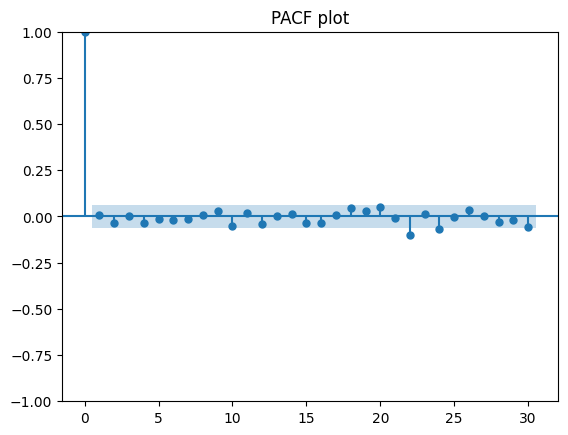

In [233]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(12, 6))
plot_pacf(df['pct_change'], lags=30)  # PACF grafiğini oluşturuyoruz
plt.title("PACF plot")
plt.show()

In [234]:
 for i in range(1, 30):
     print(df['pct_change'].rolling(window=i).sum().corr(df['pct_change'], method='pearson'), i)

0.9999999999999998 1
0.7088000229968608 2
0.562991485194051 3
0.4919578503496615 4
0.42725555878769717 5
0.388022383798108 6
0.35447495005525786 7
0.3294031401457819 8
0.31724883398344067 9
0.3121334823871158 10
0.2821788540965497 11
0.27716558982741285 12
0.2571521103971244 13
0.24957439382989524 14
0.24753158742352305 15
0.2315405798528883 16
0.2171087509642003 17
0.2150608723291684 18
0.2242380567293318 19
0.22645197496475436 20
0.23223267604960549 21
0.22434197955317914 22
0.19789938933695086 23
0.19604202077010474 24
0.17633003847662335 25
0.17248728772913202 26
0.17972397515577032 27
0.17817888438293214 28
0.16976634397734425 29


In [235]:
for i in range(1,30):
    print(df['pct_change'].shift(i).corr(df['pct_change'], method='pearson'), i)

0.005894867420375526 1
-0.036438323796748356 2
0.0032286937854999528 3
-0.03542992287803174 4
-0.013029319954243966 5
-0.01897814658796153 6
-0.015752432198414396 7
0.012401917827482853 8
0.03189711761684554 9
-0.052448369167469755 10
0.01772749124239809 11
-0.03696996763427223 12
-0.0012941126531743582 13
0.018515322902672958 14
-0.037763318955163445 15
-0.03413891806236098 16
0.01474080682361173 17
0.04883045706169535 18
0.03081309980109937 19
0.05599305836955674 20
-0.01138484991457012 21
-0.09871873151836742 22
0.007011109468909574 23
-0.0726657197103123 24
-0.007432496904017591 25
0.048944154672935364 26
0.007525666884935203 27
-0.024422065513221673 28
-0.017031742624215418 29


In [236]:
df['trend_lag'] = df['trend'].shift(7)

df['pct_change_lag'] = df['pct_change'].shift(1)

df.dropna(inplace=True)


<Figure size 1200x600 with 0 Axes>

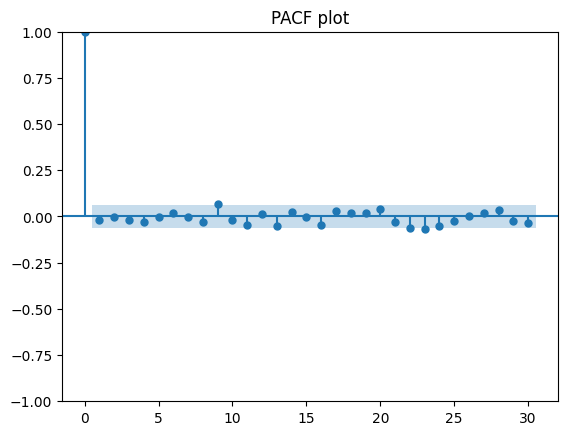

In [237]:
plt.figure(figsize=(12, 6))
plot_pacf(df['trend'], lags=30)  # PACF grafiğini oluşturuyoruz
plt.title("PACF plot")
plt.show()

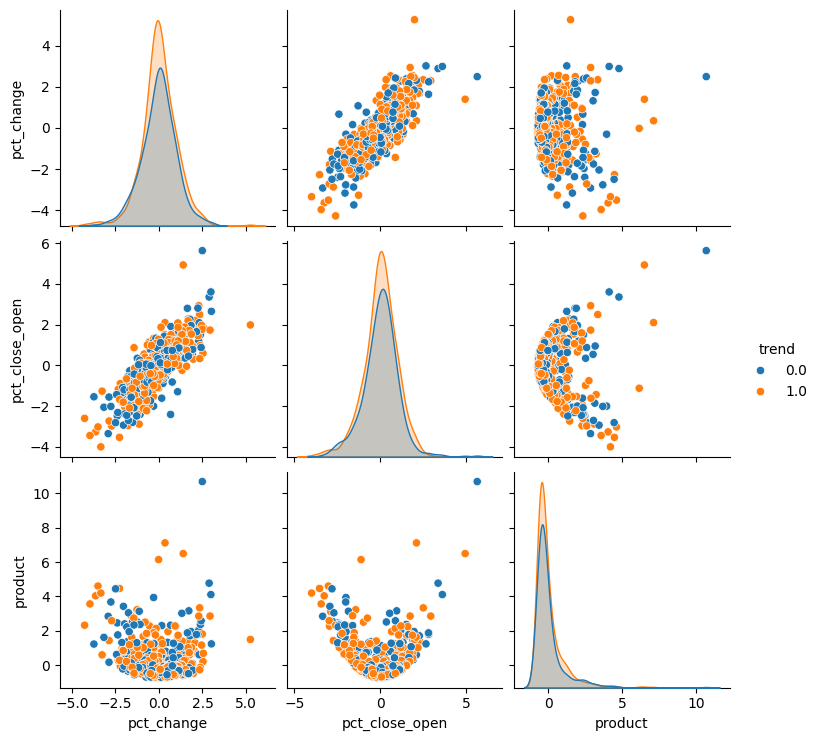

In [238]:
# pairplot
sns.pairplot(df[['pct_change', 'pct_close_open', 'product', 'trend']], hue='trend')

In [239]:
df.head()

dividends  pct_change  pct_open_close  pct_close_open  \
8           0   -0.107775        0.002974       -0.652154   
9           0    0.090695       -0.002201       -0.197797   
10          0    0.412433        0.003362        0.807223   
11          0   -0.149412       -0.004792       -0.535387   
12          0   -0.043433       -0.007136        0.557981   

    second_diff_seasonal  continuous_increased  continuous_decreased  \
8              -0.589960             -0.742423              1.026650   
9               0.095512             -0.122244             -0.712553   
10              0.526210              0.497936             -0.712553   
11             -0.558200             -0.742423              0.157049   
12             -0.563789             -0.122244             -0.712553   

    sentiment_score   product  product_diff  ...  month_Jul  month_Jun  \
8          2.571231 -0.165228     -0.286342  ...          0          0   
9          1.457537 -0.417761     -0.044583  ...          0          0   
10        -0.565166 -0.496588      0.282911  ...          0          0   
11        -1.175682 -0.569968     -0.119550  ...          0          0   
12        -0.932998 -0.464058      0.215861  ...          0          0   

    month_Mar  month_May  month_Nov  month_Oct  month_Sep  trend  trend_lag  \
8           0          0          0          0          0    0.0        1.0   
9           0          0          0          0          0    1.0        0.0   
10          0          0          0          0          0    0.0        1.0   
11          0          0          0          0          0    1.0        0.0   
12          0          0          0          0          0    1.0        1.0   

    pct_change_lag  
8        -0.130058  
9        -0.107775  
10        0.090695  
11        0.412433  
12       -0.149412  

[5 rows x 30 columns]

In [240]:
df[['pct_change_lag', 'pct_close_open_lag', 'product_lag']] = df[['pct_change', 'pct_close_open', 'product']].shift(6)
df['trend_lag'] = df['trend'].shift(7)

In [241]:
df[['pct_change_lag', 'pct_close_open_lag', 'product_lag', 'trend_lag', 'trend']].corr(method='pearson')

pct_change_lag  pct_close_open_lag  product_lag  \
pct_change_lag            1.000000            0.815538    -0.099594   
pct_close_open_lag        0.815538            1.000000    -0.076167   
product_lag              -0.099594           -0.076167     1.000000   
trend_lag                 0.621642            0.735723    -0.089437   
trend                    -0.028667           -0.019460     0.001606   

                    trend_lag     trend  
pct_change_lag       0.621642 -0.028667  
pct_close_open_lag   0.735723 -0.019460  
product_lag         -0.089437  0.001606  
trend_lag            1.000000 -0.000494  
trend               -0.000494  1.000000

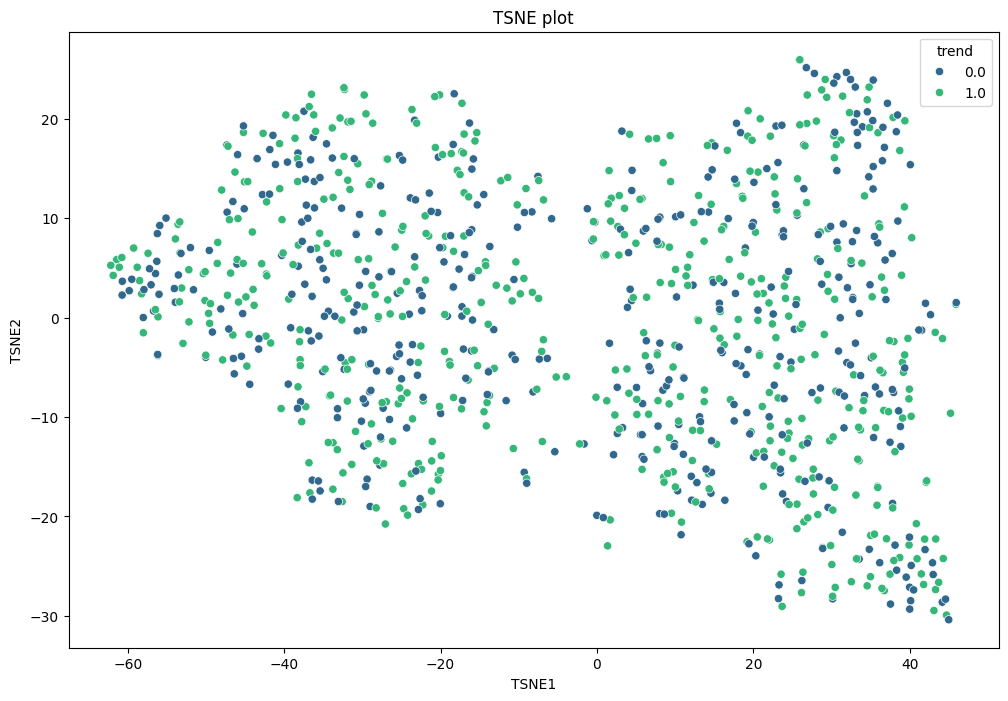

In [242]:
from sklearn.manifold import TSNE

# Initialize TSNE
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
X_tsne = tsne.fit_transform(X)

# Create a DataFrame for the TSNE results
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['trend'] = y.values

# Plot the TSNE results
plt.figure(figsize=(12, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='trend', data=tsne_df, palette='viridis')
plt.title('TSNE plot')
plt.show()

In [243]:
df.dropna(inplace=True)
# trend to last column
trend = df.pop('trend')
df['trend'] = trend


2025-02-04 01:34:58.676044: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-02-04 01:34:58.677201: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-02-04 01:34:58.678181: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/100


2025-02-04 01:34:59.080166: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-02-04 01:34:59.081556: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-02-04 01:34:59.082530: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

19/22 [========================>.....] - ETA: 0s - loss: 0.6085 - accuracy: 0.7418

2025-02-04 01:35:02.445627: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-02-04 01:35:02.446919: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-02-04 01:35:02.447817: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

22/22 [==============================] - 4s 33ms/step - loss: 0.6010 - accuracy: 0.7445 - val_loss: 0.5613 - val_accuracy: 0.7500
Epoch 2/100
22/22 [==============================] - 0s 6ms/step - loss: 0.5565 - accuracy: 0.7578 - val_loss: 0.5625 - val_accuracy: 0.7500
Epoch 3/100
22/22 [==============================] - 0s 7ms/step - loss: 0.5558 - accuracy: 0.7578 - val_loss: 0.5591 - val_accuracy: 0.7500
Epoch 4/100
22/22 [==============================] - 0s 7ms/step - loss: 0.5587 - accuracy: 0.7578 - val_loss: 0.5559 - val_accuracy: 0.7500
Epoch 5/100
22/22 [==============================] - 0s 6ms/step - loss: 0.5470 - accuracy: 0.7578 - val_loss: 0.5551 - val_accuracy: 0.7500
Epoch 6/100
22/22 [==============================] - 0s 6ms/step - loss: 0.5417 - accuracy: 0.7578 - val_loss: 0.5503 - val_accuracy: 0.7500
Epoch 7/100
22/22 [==============================] - 0s 6ms/step - loss: 0.5344 - accuracy: 0.7578 - val_loss: 0.5415 - val_accuracy: 0.7500
Epoch 8/100
22/22 [=====

2025-02-04 01:35:17.587936: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-02-04 01:35:17.589463: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-02-04 01:35:17.590411: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

6/6 [==============================] - 0s 2ms/step
Train RMSE: 0.1457681034158007
Test RMSE: 0.4714045207910317


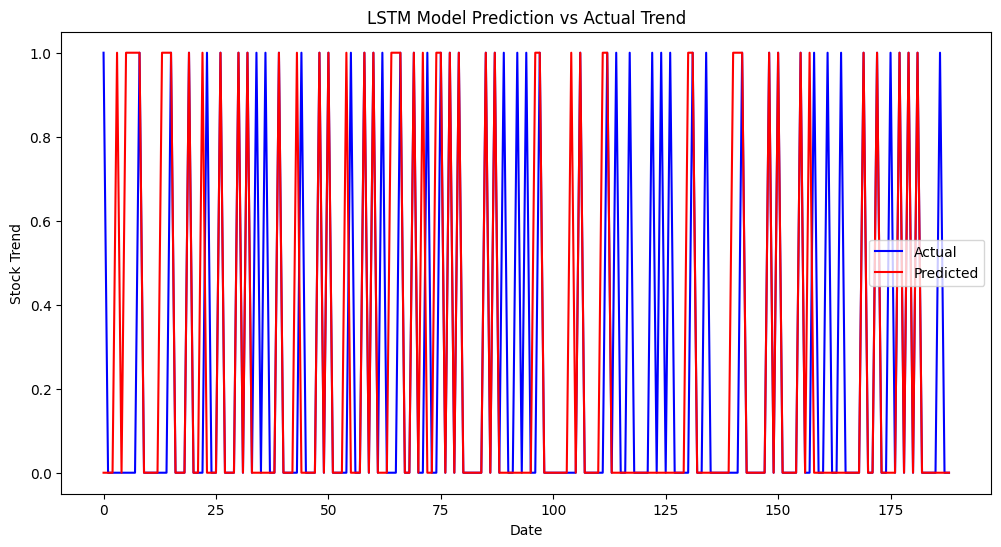

In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Scale the data (assuming df is your dataset with 'trend' as the last column)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), :]
        X.append(a)
        
        # Here, we compute the binary labels (1 for upward movement, 0 for downward movement)
        if data[i + time_step, -1] > data[i + time_step - 1, -1]:  # Trend increase
            y.append(1)
        else:  # Trend decrease
            y.append(0)
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(scaled_data, time_step)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Build the LSTM model
model = Sequential()

# Adding LSTM layers with Dropout for regularization
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, X.shape[2])))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting

model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(25))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary output

# Compile the model with binary crossentropy loss for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with validation split
model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Convert the continuous predictions into binary (0 or 1) based on the sigmoid output
train_predict_binary = (train_predict > 0.5).astype(int)
test_predict_binary = (test_predict > 0.5).astype(int)

# Inverse transform the predictions to the original scale
train_predict_inverse = scaler.inverse_transform(np.concatenate((train_predict_binary, np.zeros((train_predict_binary.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]
test_predict_inverse = scaler.inverse_transform(np.concatenate((test_predict_binary, np.zeros((test_predict_binary.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]

# Inverse transform the actual values
y_train_actual = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]

# Calculate RMSE (Root Mean Squared Error) for better evaluation
train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_predict_inverse))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_predict_inverse))

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual', color='blue')
plt.plot(test_predict_inverse, label='Predicted', color='red')
plt.title('LSTM Model Prediction vs Actual Trend')
plt.xlabel('Date')
plt.ylabel('Stock Trend')
plt.legend()
plt.show()


In [258]:
confusion_matrix(y_test_actual, test_predict_inverse)

array([[116,  20],
       [ 22,  31]])

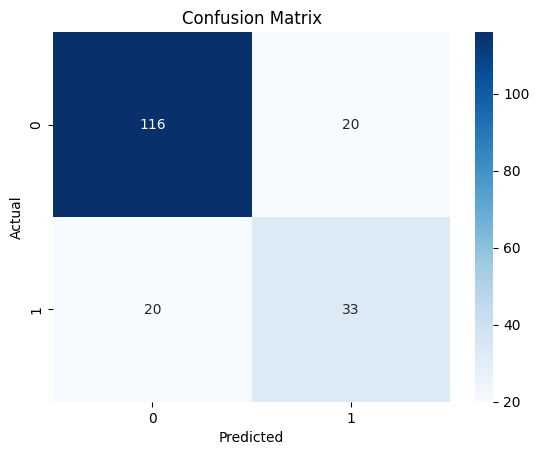

In [246]:
# plot confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_actual, test_predict_inverse)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [247]:
accuracy_score(y_test_actual, test_predict_inverse)

0.7883597883597884

In [248]:

# tranin test split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='trend'), df['trend'], test_size=0.2, shuffle=False)

clf = DecisionTreeClassifier()


clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

plt.figure(figsize=(100, 100))
plot_tree(clf, filled=True, feature_names=df.drop(columns='trend').columns)
plt.show();

0.5340314136125655


In [249]:
# create a classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.48      0.49      0.49        86
         1.0       0.58      0.57      0.57       105

    accuracy                           0.53       191
   macro avg       0.53      0.53      0.53       191
weighted avg       0.53      0.53      0.53       191



In [250]:
# try xgboost
from xgboost import XGBClassifier



xgb = XGBClassifier()

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print(accuracy_score(y_test, y_pred))


0.4973821989528796


In [251]:
# create a confusion matrix

confusion_matrix(y_test, y_pred)



array([[38, 48],
       [48, 57]])

In [252]:
# random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(accuracy_score(y_test, y_pred))

# create a confusion matrix

confusion_matrix(y_test, y_pred)


0.4031413612565445


array([[38, 48],
       [66, 39]])

In [253]:
# neural network tensorflow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=1000)

y_pred = model.predict(X_test)

y_pred = [1 if x > 0.5 else 0 for x in y_pred]

print(accuracy_score(y_test, y_pred))

# create a confusion matrix

confusion_matrix(y_test, y_pred)


Epoch 1/1000
24/24 [==============================] - 1s 1ms/step - loss: 0.6908 - accuracy: 0.5328
Epoch 2/1000
24/24 [==============================] - 0s 947us/step - loss: 0.6744 - accuracy: 0.5787
Epoch 3/1000
24/24 [==============================] - 0s 974us/step - loss: 0.6582 - accuracy: 0.6207
Epoch 4/1000
24/24 [==============================] - 0s 989us/step - loss: 0.6445 - accuracy: 0.6339
Epoch 5/1000
24/24 [==============================] - 0s 869us/step - loss: 0.6311 - accuracy: 0.6509
Epoch 6/1000
24/24 [==============================] - 0s 855us/step - loss: 0.6142 - accuracy: 0.6732
Epoch 7/1000
24/24 [==============================] - 0s 849us/step - loss: 0.5894 - accuracy: 0.6982
Epoch 8/1000
24/24 [==============================] - 0s 915us/step - loss: 0.5680 - accuracy: 0.7139
Epoch 9/1000
24/24 [==============================] - 0s 878us/step - loss: 0.5494 - accuracy: 0.7126
Epoch 10/1000
24/24 [==============================] - 0s 937us/step - loss: 0.5289 

array([[39, 47],
       [56, 49]])